# Test PDPbox with multiclass classification problem
## Kaggle Otto Group with XGBoost
This demo is based on **Otto Group Product Classification Challenge**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np

%matplotlib inline

### read training set

In [2]:
otto_raw = pd.read_csv('otto_train.csv')

In [3]:
otto_raw.head()

id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

    ...     feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0   ...           1        0        0        0        0        0        0   
1   ...           0        0        0        0        0        0        0   
2   ...           0        0        0        0        0        0        0   
3   ...           0        1        2        0        0        0        0   
4   ...           1        0        0        0        0        1        0   

   feat_92  feat_93   target  
0        0        0  Class_1  
1        0        0  Class_1  
2        0        0  Class_1  
3        0        0  Class_1  
4        0        0  Class_1  

[5 rows x 95 columns]

In [4]:
otto_raw['target'] = otto_raw['target'].apply(lambda x : int(x.split('_')[1])-1)
otto_train = otto_raw.drop(['id', 'target'], axis=1)

## XGBoost with PDPbox
### create model

In [5]:
clf = xgb.XGBClassifier(objective='multi:softprob', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100, nthread=4)
%time clf.fit(otto_train, otto_raw['target'])

Wall time: 2min 58s


XGBClassifier(base_score=0.5, colsample_bylevel=0.85, colsample_bytree=0.85,
       gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.85)

# start testing PDPbox

In [7]:
from pdpbox import pdp

### add target plot for feat_67

### first dummy the multiple targets

In [8]:
target_dummies = pd.get_dummies(otto_raw['target'], prefix='target')
otto_raw = pd.concat([otto_raw, target_dummies], axis=1)

### choose one target

In [9]:
from pdpbox import info_plots

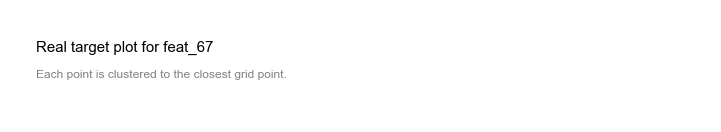

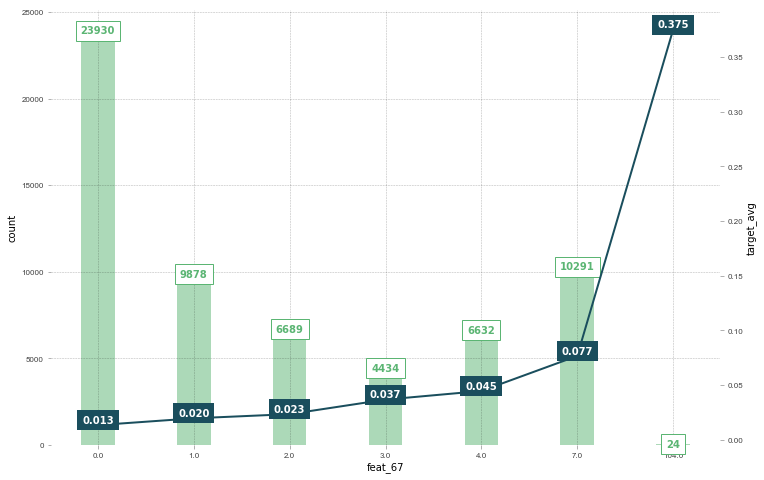

In [10]:
info_plots.target_plot(otto_raw, 'feat_67', 'feat_67', 'target_0', figsize=(12, 8))

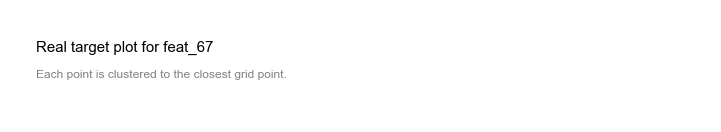

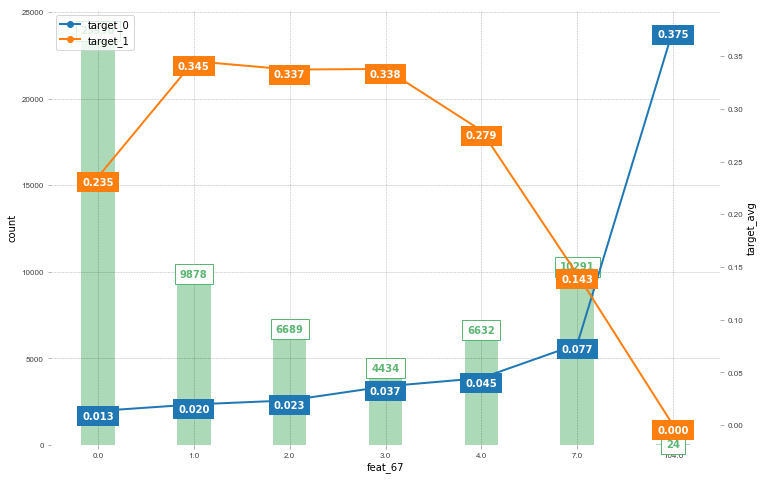

In [11]:
info_plots.target_plot(otto_raw, 'feat_67', 'feat_67', ['target_0', 'target_1'], figsize=(12, 8))

#### since this dataset only have numeric features..
For multiclass classification problem, each class would have a corresponding plot.

Wall time: 15.4 s


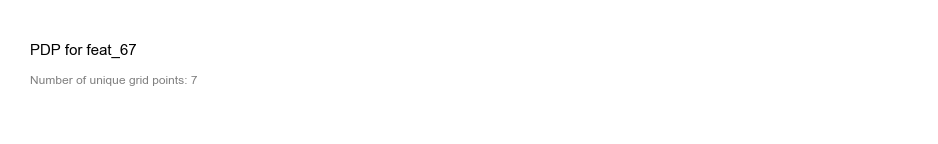

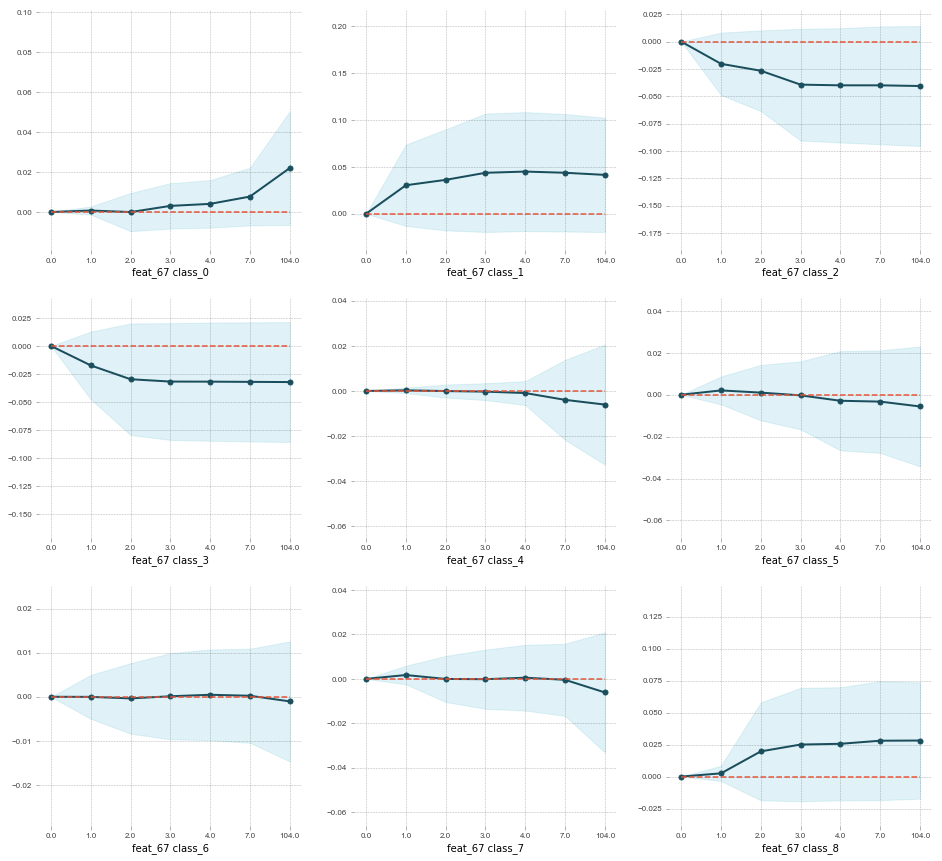

In [12]:
%%time
pdp_feat_67 = pdp.pdp_isolate(clf, otto_train, 'feat_67')
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, x_quantile=True, ncols=3)

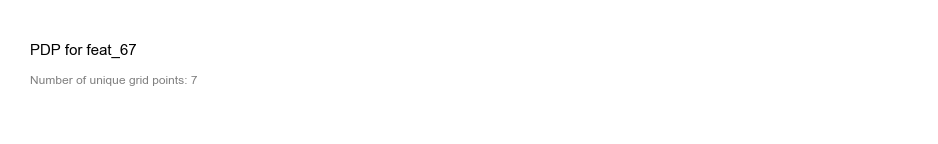

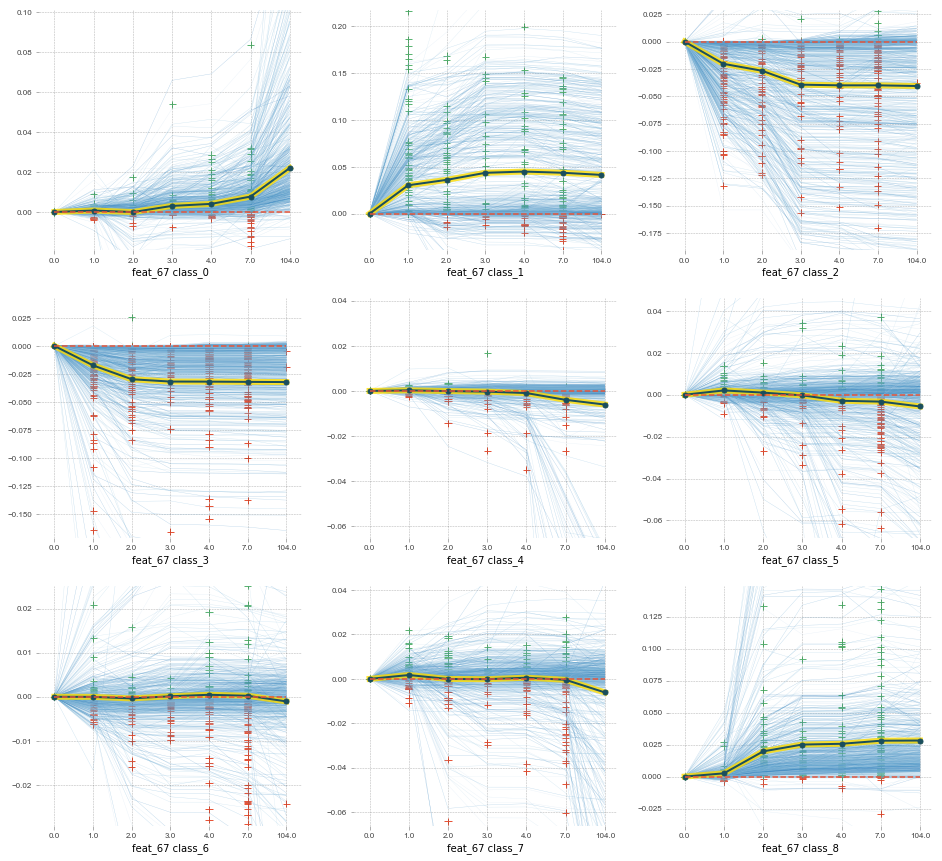

In [13]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, x_quantile=True, ncols=3, plot_org_pts=True, plot_lines=True, frac_to_plot=0.01)

#### try to plot out the actual predictions

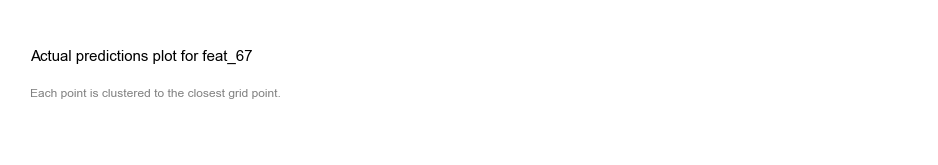

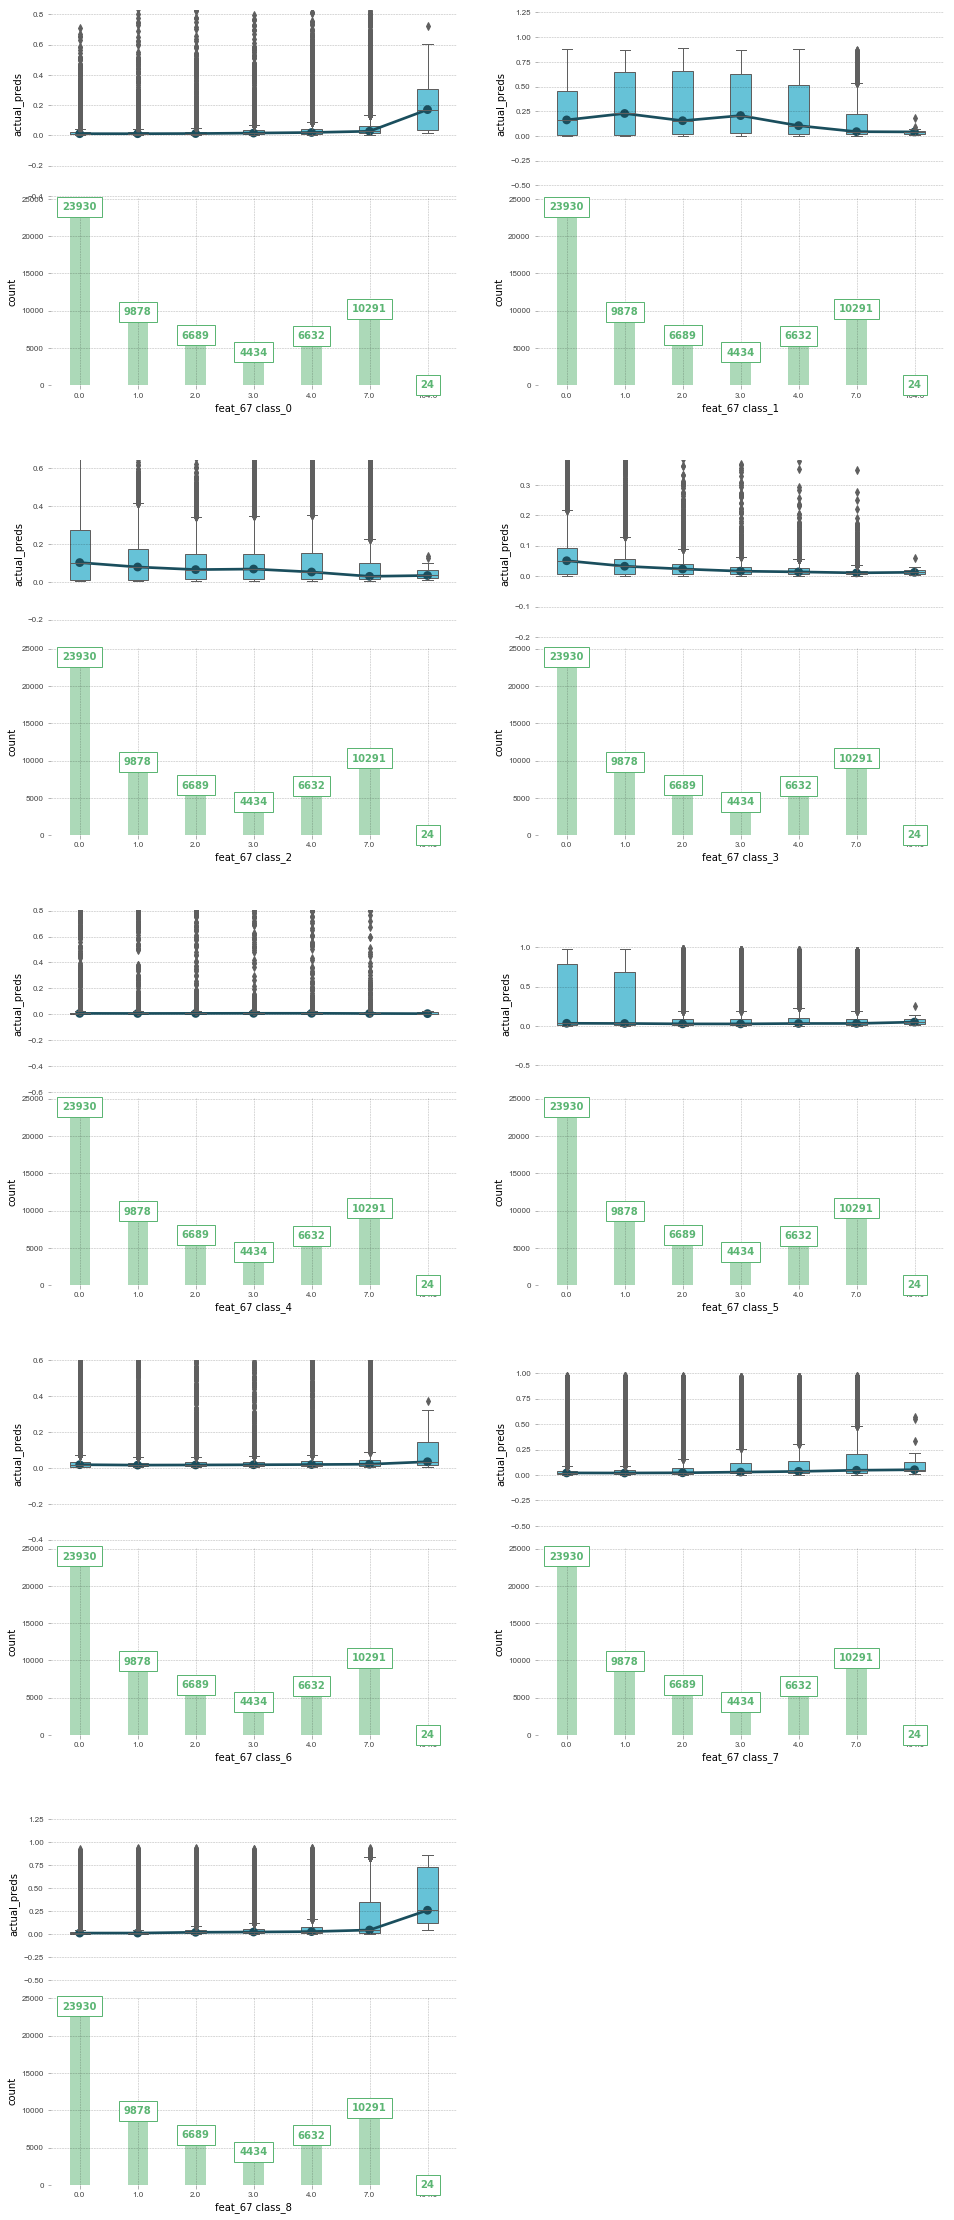

In [14]:
info_plots.actual_plot(pdp_feat_67, 'feat_67')

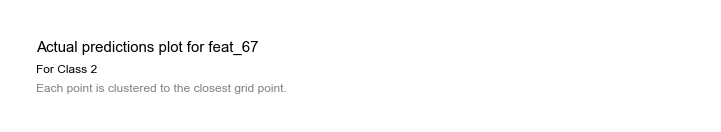

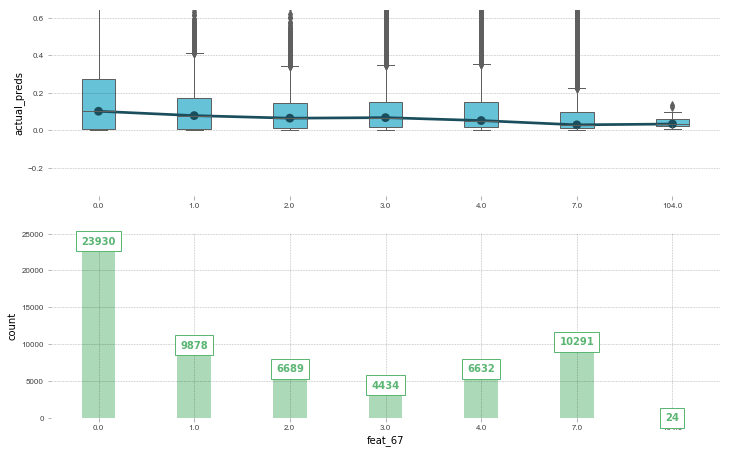

In [15]:
info_plots.actual_plot(pdp_feat_67, 'feat_67', multi_flag=True, which_class=2, figsize=(12, 8))

#### you can also set multi_flag=True, which_class=(the class you want to check)

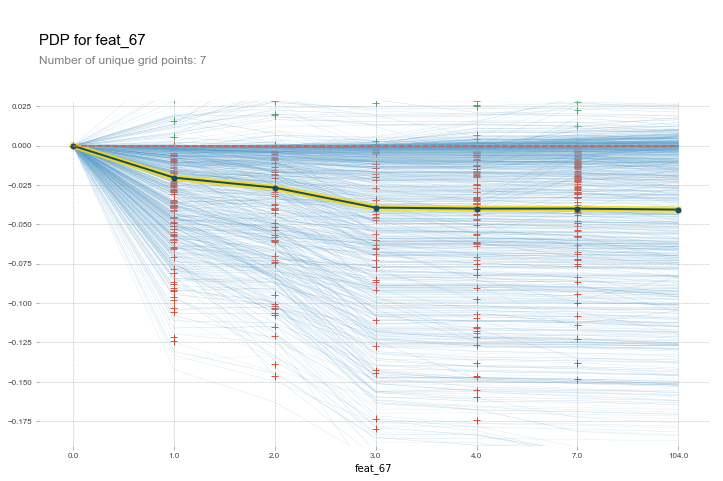

In [16]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, x_quantile=True, figsize=(12, 8))

#### do clustering

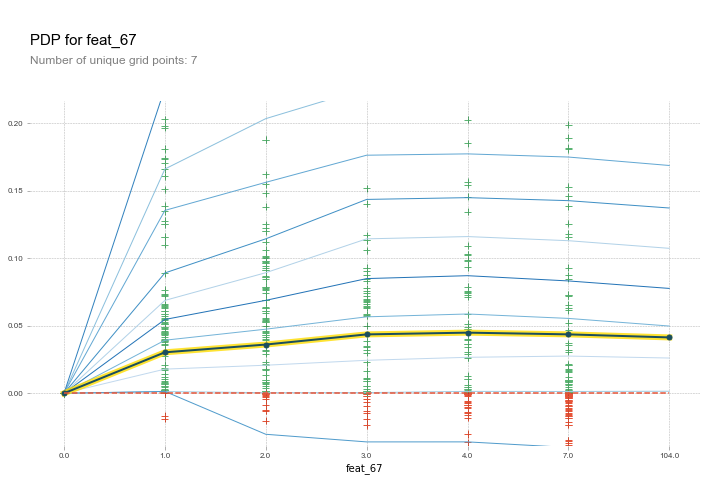

In [17]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=1, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, x_quantile=True, cluster=True, n_cluster_centers=10, figsize=(12, 8))

#### try to customize percentile range

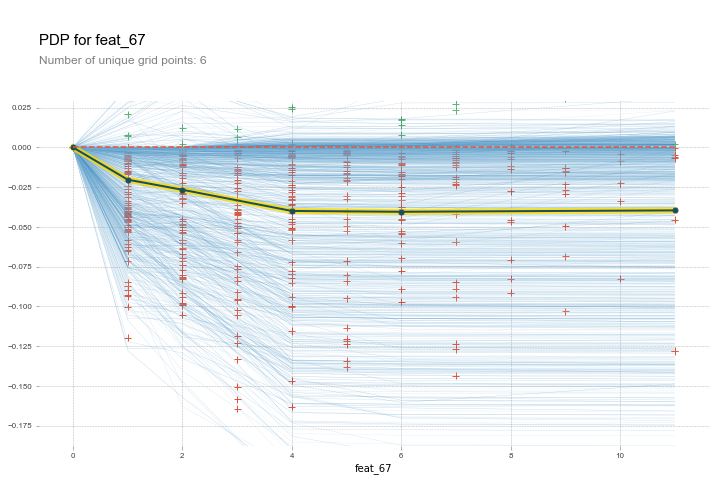

In [18]:
pdp_feat_67 = pdp.pdp_isolate(clf, otto_train, 'feat_67', percentile_range=(5, 95))
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, figsize=(12, 8))

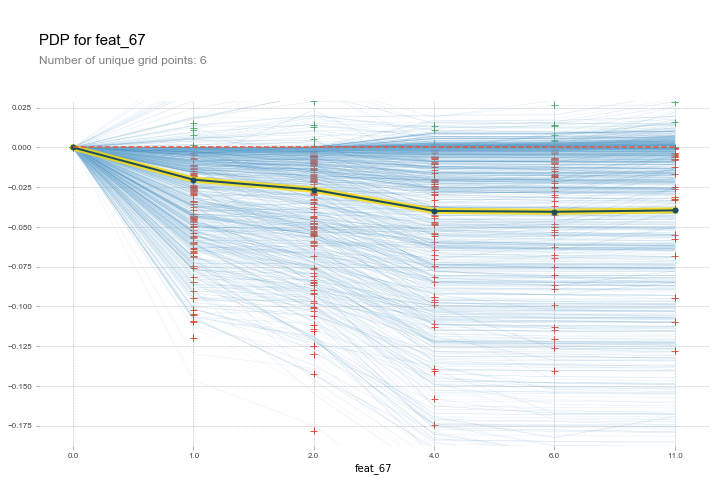

In [19]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, x_quantile=True, figsize=(12, 8))

#### try to customized the grid points

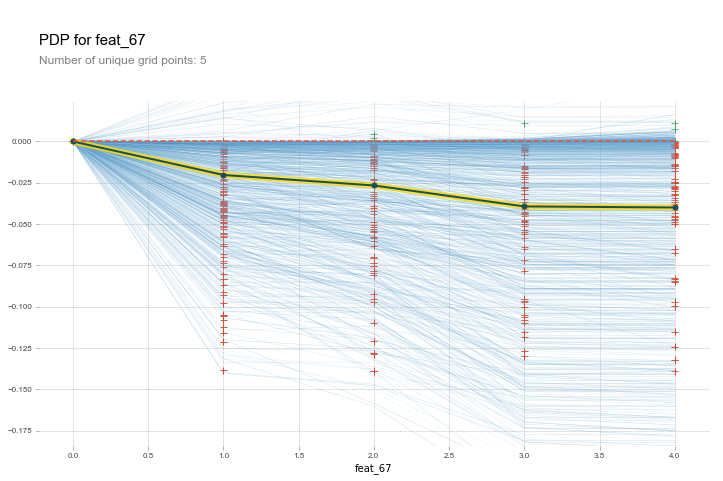

In [20]:
pdp_feat_67 = pdp.pdp_isolate(clf, otto_train, 'feat_67', cust_grid_points=range(5))
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, figsize=(12, 8))

## test interaction

In [21]:
pdp_67_24 = pdp.pdp_interact(clf, otto_train, ['feat_67', 'feat_24'], num_grid_points=[10, 10])

#### only plot for class 5

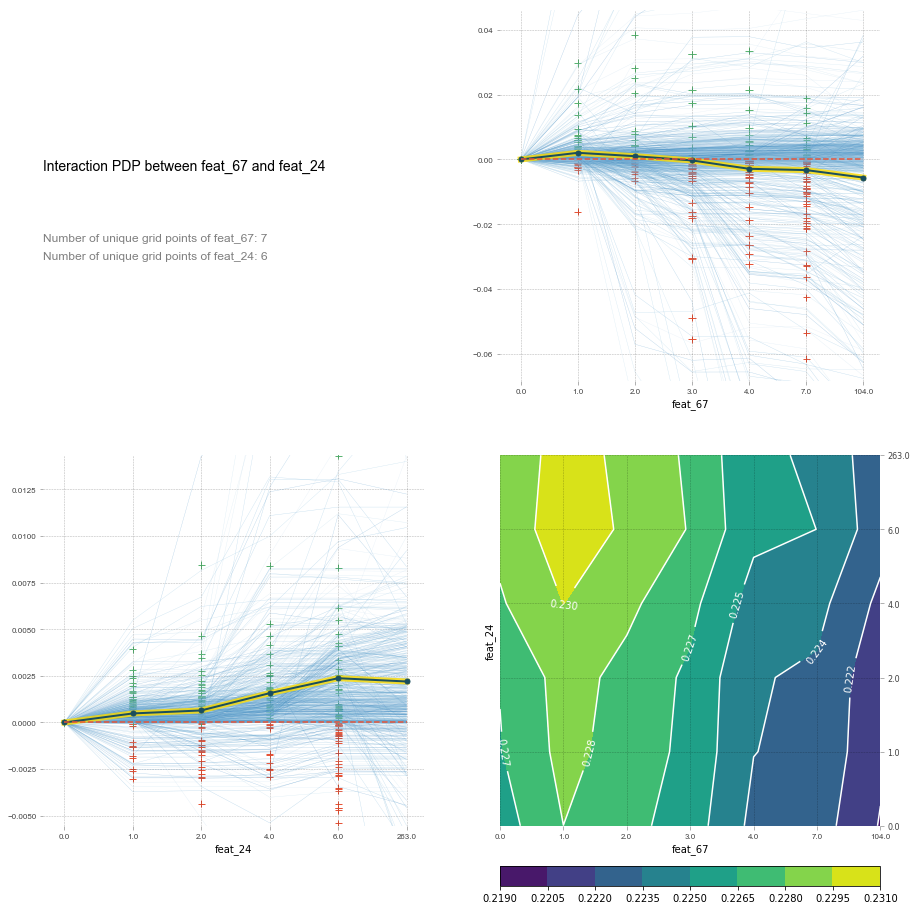

In [22]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
            frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True)

#### only plot out the contour plot

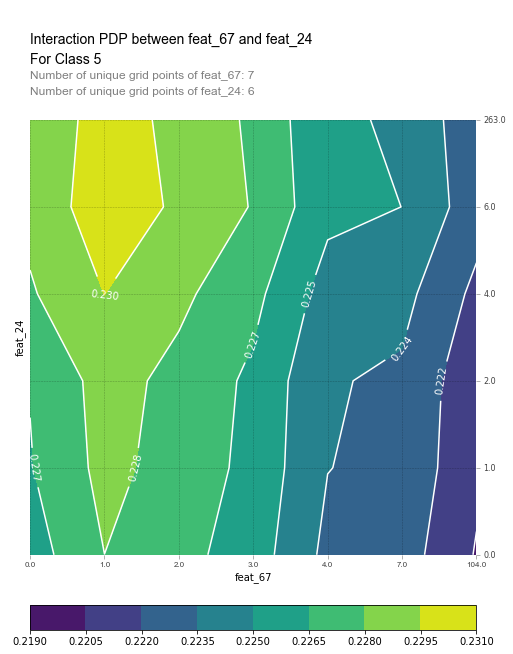

In [23]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
                      frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True, only_inter=True)

#### plot out for all classes

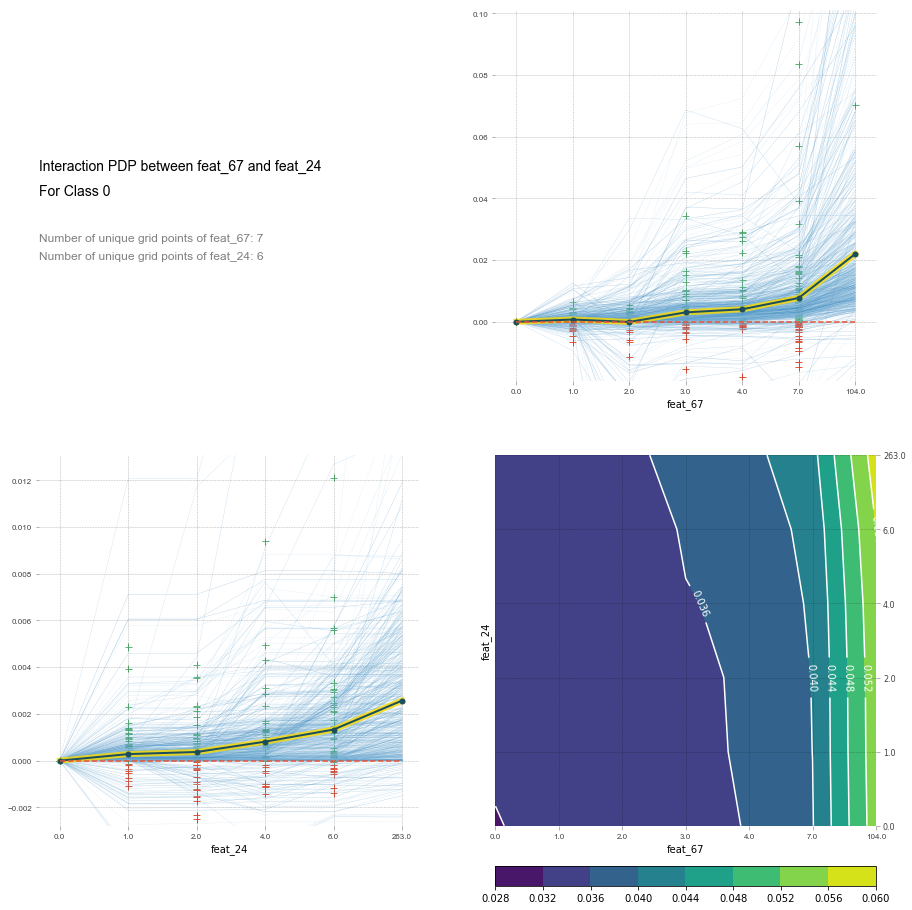

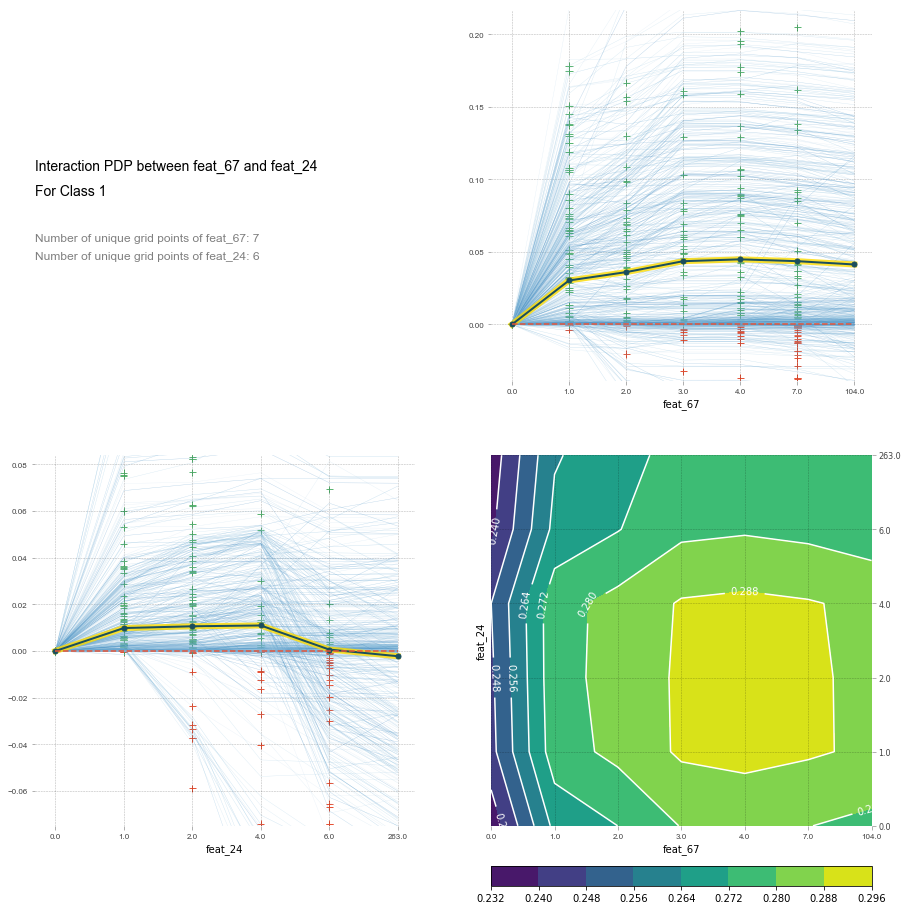

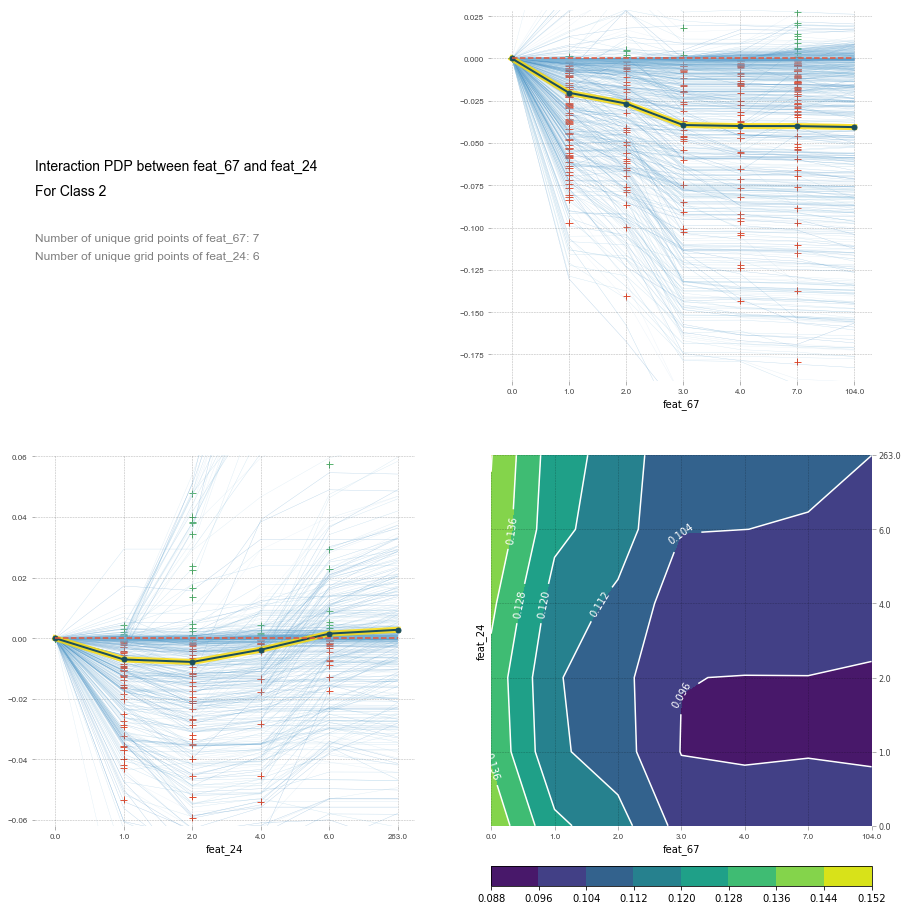

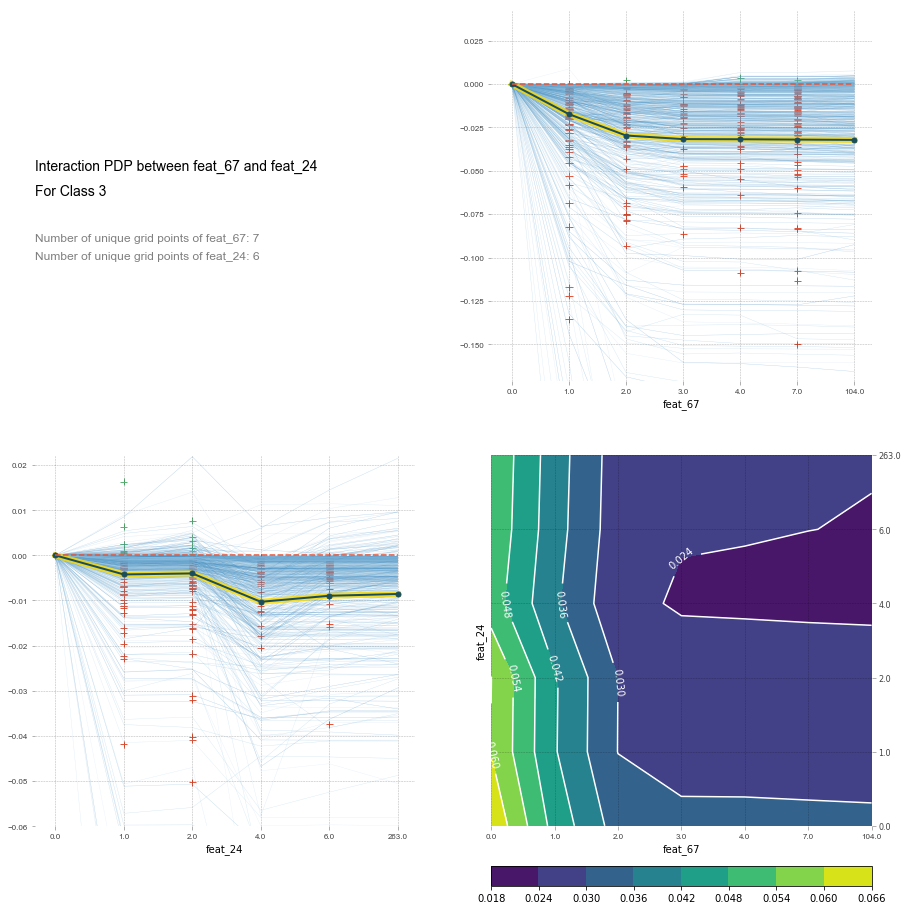

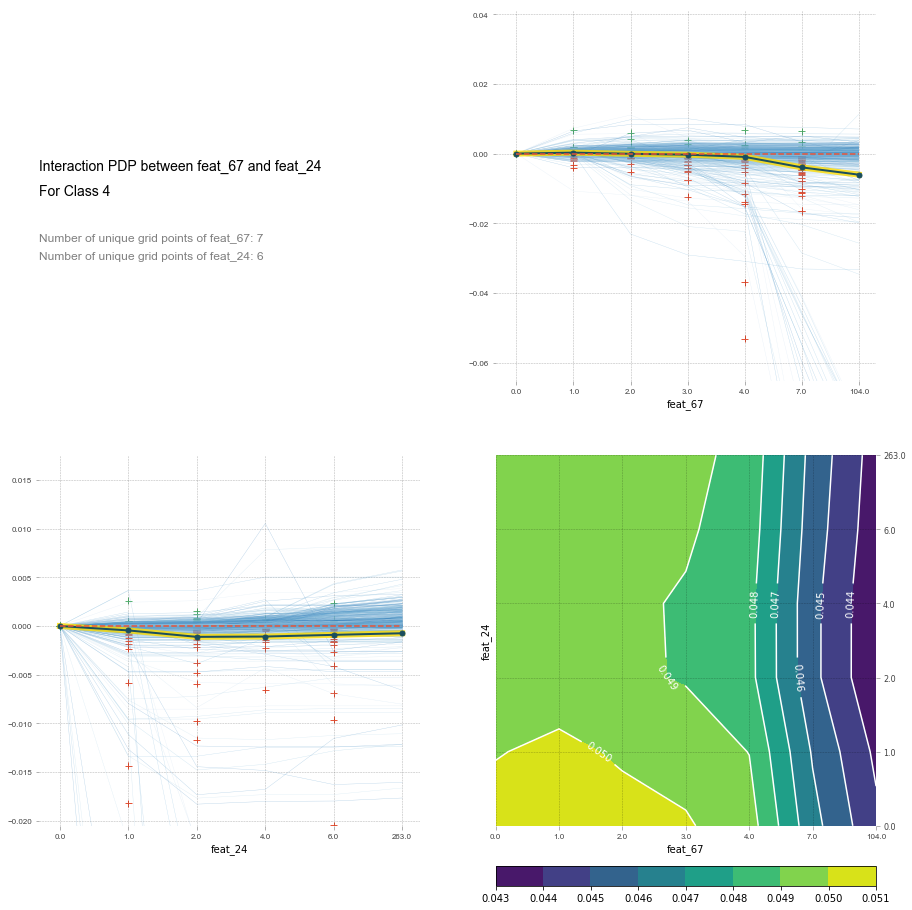

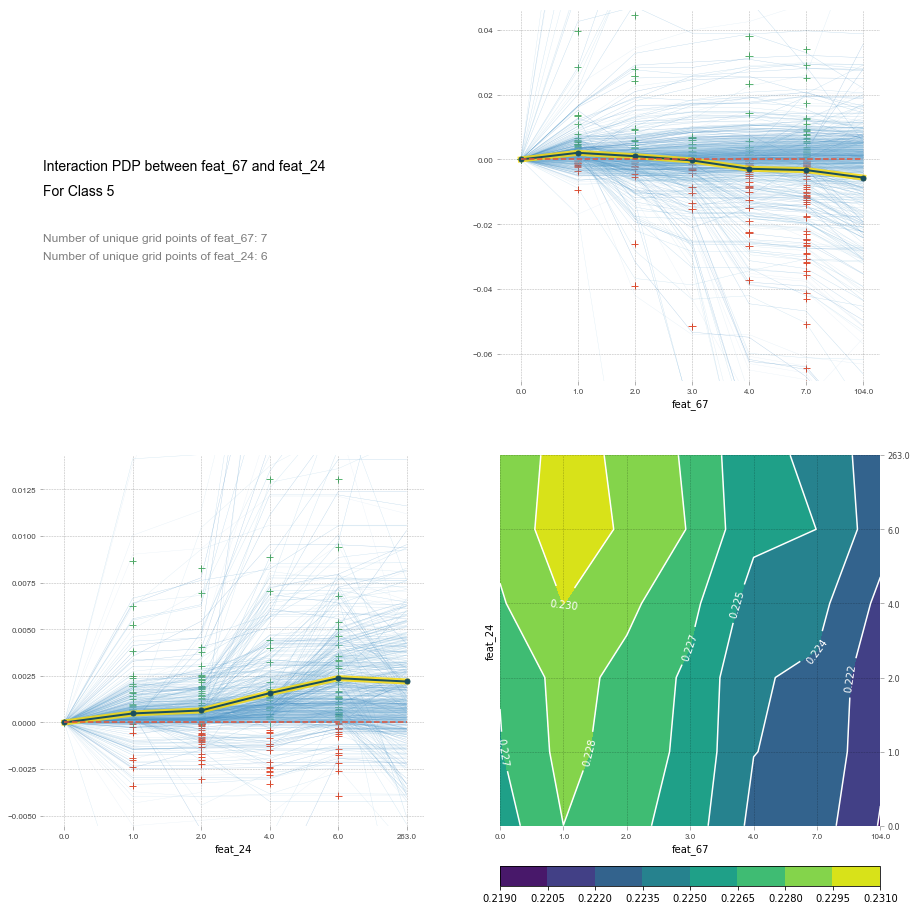

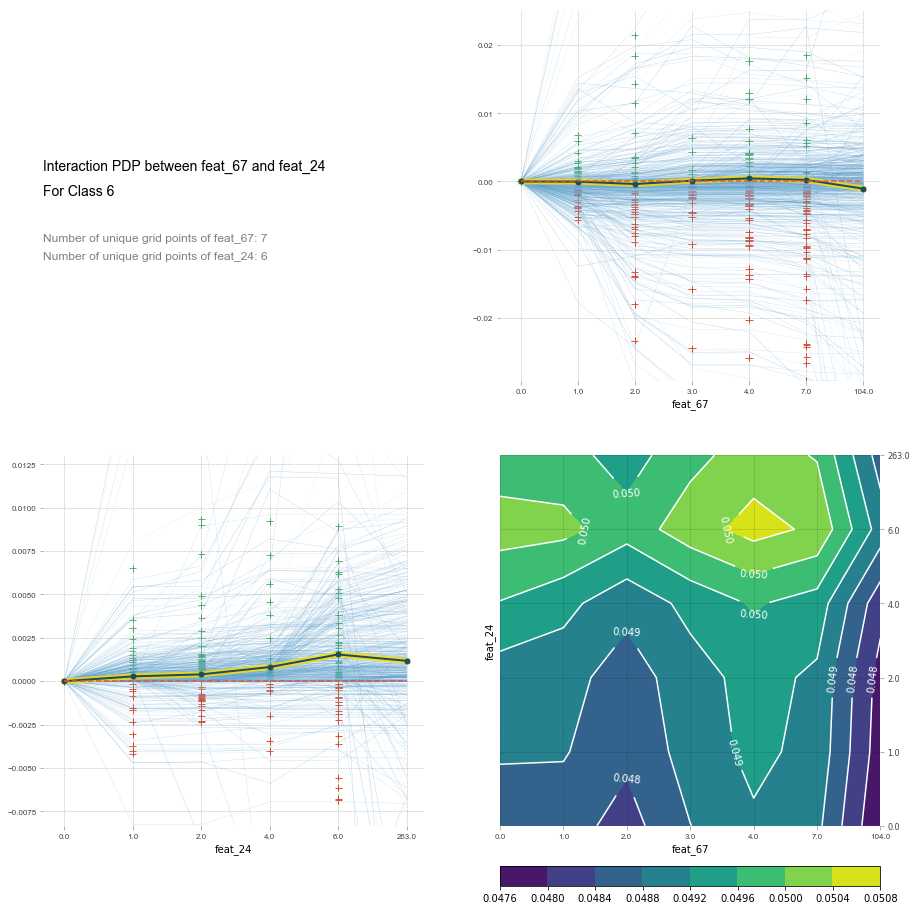

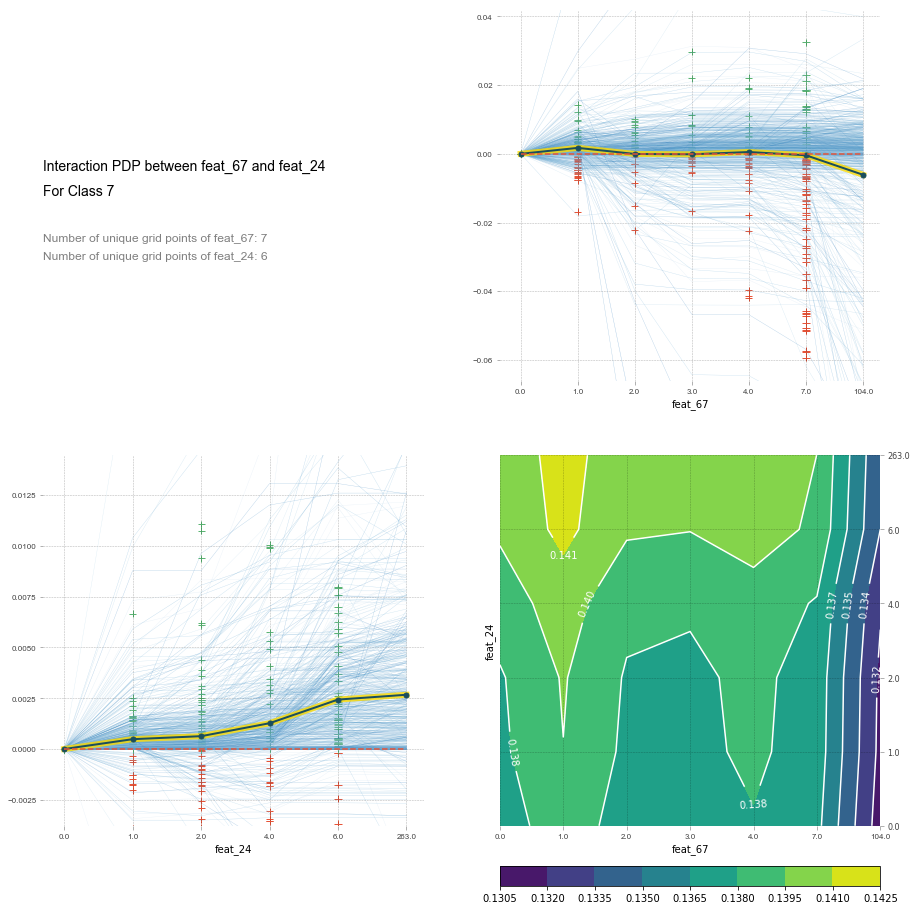

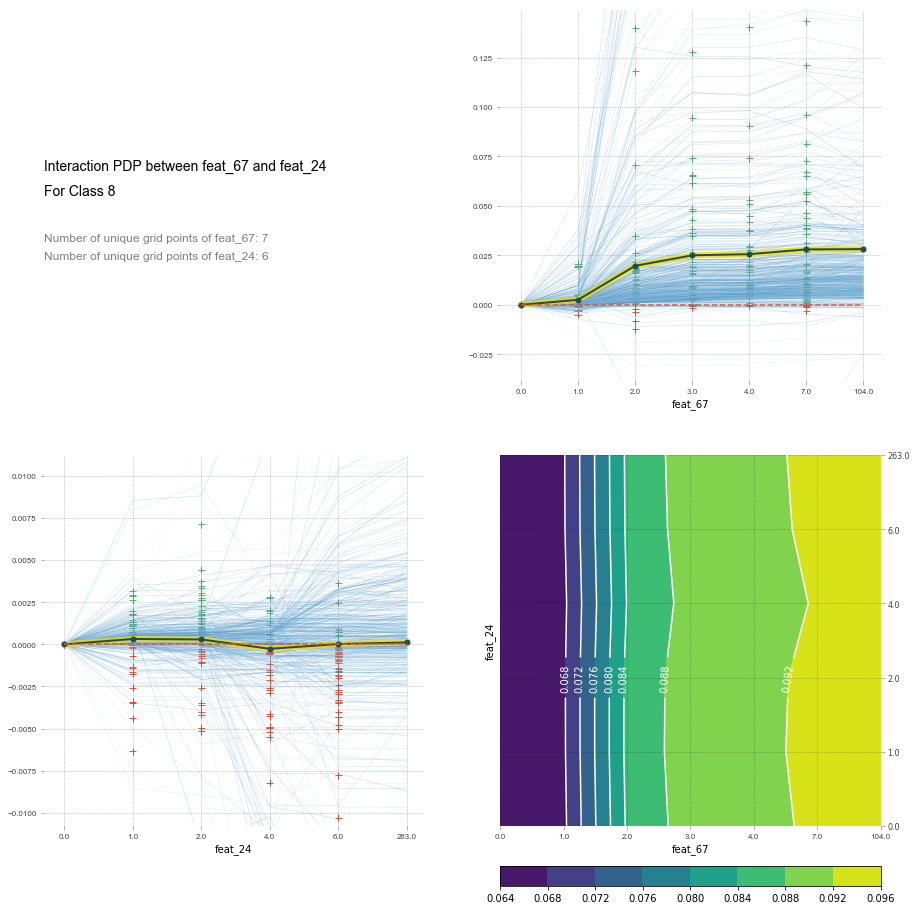

In [24]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.01, x_quantile=True)

#### only plot out contours for all classes

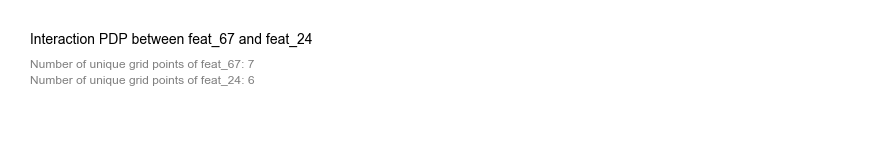

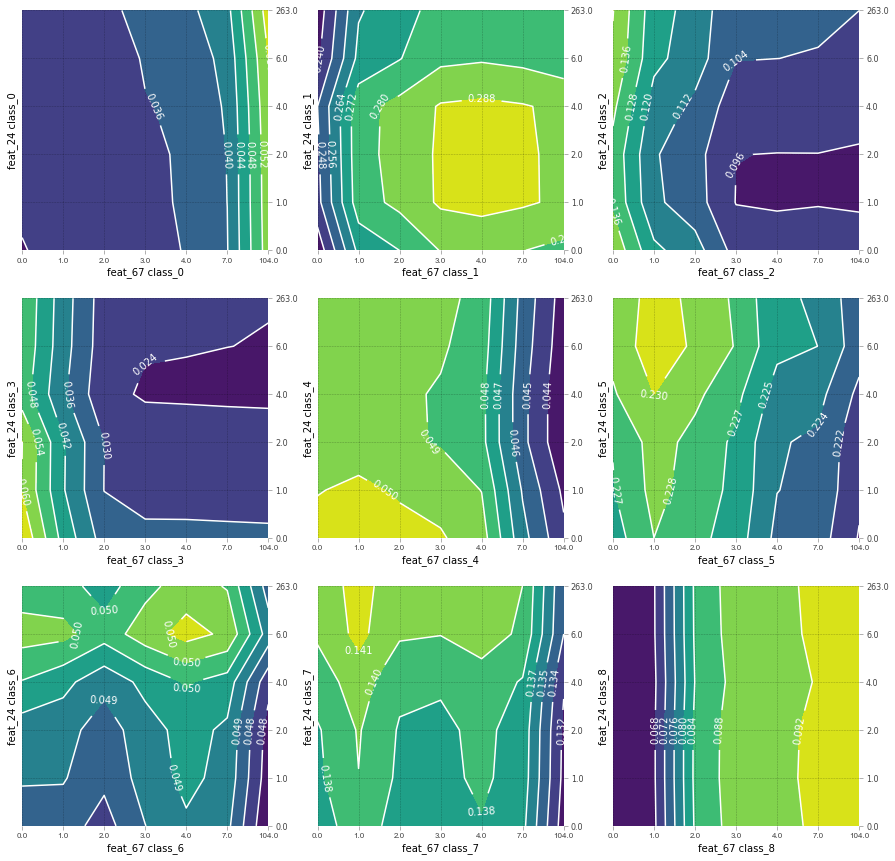

In [25]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
                      frac_to_plot=0.01, multi_flag=False, x_quantile=True, only_inter=True, ncols=3)